In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import plotting

reload(lattice)
reload(hamiltonian)
reload(plotting)



<module 'tblib.plotting' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\plotting.py'>

# Normal state Hamiltonian

- see the bandstructure and DOS of the Normal state Hamiltonian
- 3D plot of bandstructure
- test of derivative of hamiltonian entries over k

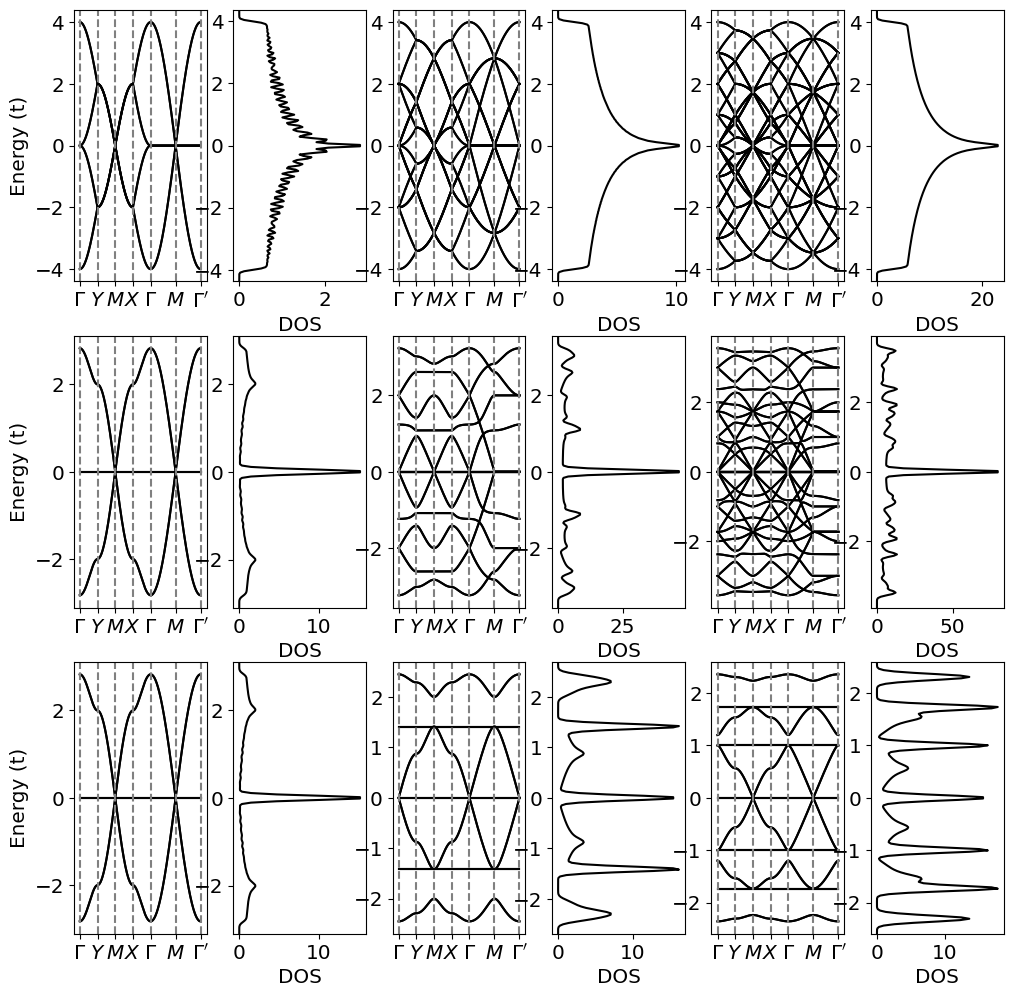

In [48]:
# Runtime: ~2 minutes (for H0 N=3,4,6)

# Create model instances
models_3 = [
    hamiltonian.DSLmodel(N=2),
    hamiltonian.dDSLmodel(N=2),
    hamiltonian.LiebNmodel(N=2),
    ]

models_4 = [
    hamiltonian.DSLmodel(N=4),
    hamiltonian.dDSLmodel(N=4),
    hamiltonian.LiebNmodel(N=4),
    ]

models_6 = [
    hamiltonian.DSLmodel(N=6),
    hamiltonian.dDSLmodel(N=6),
    hamiltonian.LiebNmodel(N=6),
    ]

# Define Figure
fig, axes = plt.subplots(len(models_3),6,figsize=(12,4*len(models_3)))

nk_dos = 30

for i, model in enumerate(models_3):
    N = models_3[i].N
    H0 = models_3[i].get_reducedH()
    axes[i, 0] = plotting.plot_bands(H0, nk=500, hsp_path='GYMXGMH', ax=axes[i, 0]);
    axes[i, 1] = plotting.plot_DOS(H0, nk=nk_dos, s=(N,N), elim=axes[i, 0].get_ylim(), ax=axes[i, 1], ylabel=None);

for i, model in enumerate(models_4):
    N = models_4[i].N
    H0 = models_4[i].get_reducedH()
    axes[i, 2] = plotting.plot_bands(H0, nk=500, hsp_path='GYMXGMH', ax=axes[i, 2], ylabel=None);
    axes[i, 3] = plotting.plot_DOS(H0, nk=nk_dos, s=(N,N), elim=axes[i, 2].get_ylim(), ax=axes[i, 3], ylabel=None);

for i, model in enumerate(models_6):
    N = models_6[i].N
    H0 = models_6[i].get_reducedH()
    axes[i, 4] = plotting.plot_bands(H0, nk=500, hsp_path='GYMXGMH', ax=axes[i, 4], ylabel=None);
    axes[i, 5] = plotting.plot_DOS(H0, nk=nk_dos, s=(N,N), elim=axes[i, 4].get_ylim(), ax=axes[i, 5], ylabel=None);

In [39]:
# Create an instance of the diagonally striped lattice
N=3

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.dDSLmodel(N=N)
H = ham.get_reducedH()

#N=1

#lat = lattice.SquareLattice()
#ham = hamiltonian.SquareLatticeModel()
#H = ham.get_HBdG()

c:\Users\atsch\Desktop\MasterVorlesungen\Masterthesis\Code\tests\..\tblib\lattice.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  ax.scatter(*sites.T, c='k' if field is None else field, cmap=cmap, vmin=vmin, vmax=vmax)


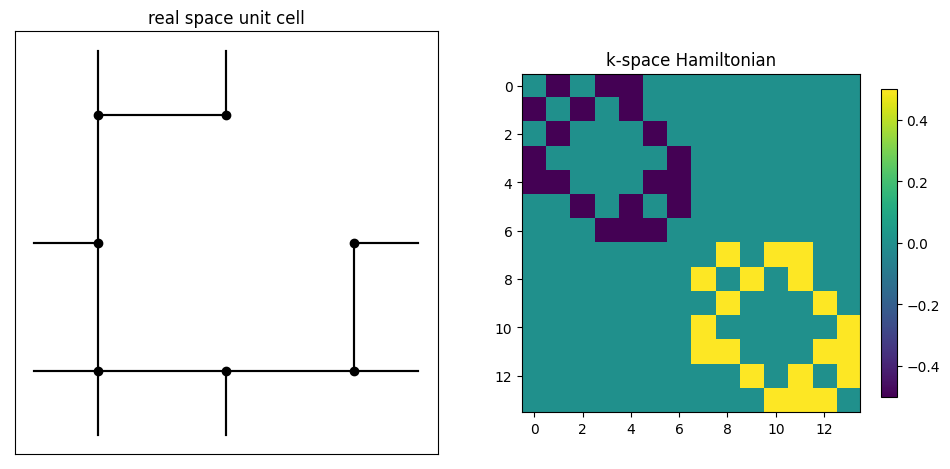

In [40]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes[0].set_title('real space unit cell')
axes[1].set_title('k-space Hamiltonian')
axes[0] = lat.plot_nn(ax=axes[0])
ax2 = axes[1].imshow(np.real(H(np.pi,np.pi)))
fig.colorbar(ax2, shrink=0.5)
plt.show()

In [41]:
k=np.linspace(0,2*np.pi,41)
E2 = np.zeros((ham.dim,41*41))
c = 0
for kx in k:
    for ky in k:
        E2[:,c] = np.linalg.eigh(H(kx,ky))[0]
        c+=1


s1=np.shape(E2)[0]
E2=E2.reshape(ham.dim,41,41)


ValueError: could not broadcast input array from shape (14,) into shape (28,)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

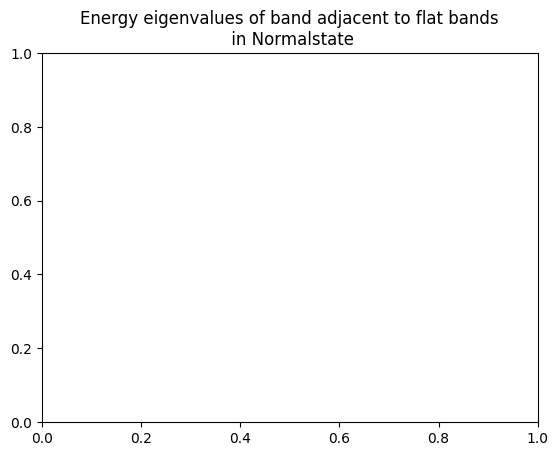

In [42]:
plt.title('Energy eigenvalues of band adjacent to flat bands\n in Normalstate')
plt.imshow(E2[3,:,:])
plt.colorbar()

In [43]:
k1 = np.linspace(0,np.pi, 50)
blankarr = np.ones(50)
k2 = np.linspace(0,np.pi, 50)

kx = np.concatenate([k1,blankarr*np.pi, k1[::-1]])
ky = np.concatenate([blankarr*0, k1, k1[::-1]])

In [45]:
E = np.zeros((int(ham.dim/2), 150))
for i in range(150):
    kxv = kx[i]
    kyv = ky[i]
    E[:,i] = np.linalg.eigh(H(kxv,kyv))[0]

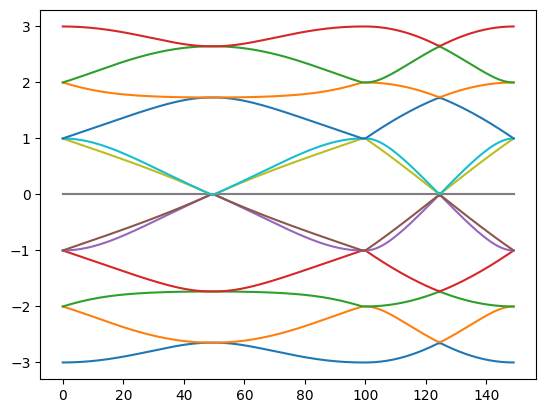

In [46]:
for i in range(np.shape(E)[0]):
    plt.plot(E[i])

In [12]:
x = np.outer(np.linspace(0, 2*np.pi, 41), np.ones(41))
y = x.copy().T
np.shape(E2)


(28, 41, 41)

In [13]:
xticks = [0, np.pi, 2*np.pi]
xlabels = [0,r'$\pi$', r'$2\pi$']
#xticks = [0,1/2*np.pi, np.pi]
#xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']

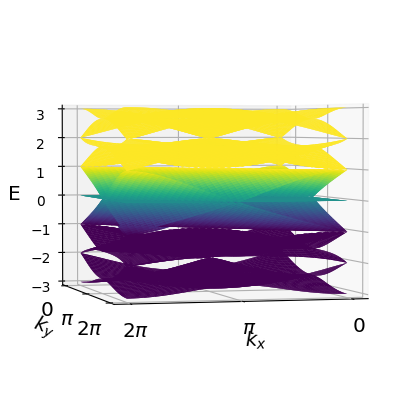

In [14]:
fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(projection='3d')
ax.set_xlabel(r'$k_x$', size='x-large')
ax.set_ylabel(r'$k_y$', size='x-large')
ax.set_zlabel(r'E', size='x-large')
ax.set_xticks(ticks=xticks, labels= xlabels, size='x-large')
ax.set_yticks(ticks=xticks, labels=xlabels, size='x-large')


for i in E2[:]:
    surf = ax.plot_surface(x,y, i, vmin=-1, vmax=1, cmap='viridis')
#surf = ax.plot_surface(x,y, E2, vmin=-3, vmax=3, cmap='viridis')
#fig.colorbar(surf)
ax.view_init(elev=2, azim=75, roll=0)
plt.show()

In [15]:
Hli = []
dHli = []
spinupH = []
k = np.linspace(0,2*np.pi, 100)
H = ham.get_HBdG()
dH = ham.get_HBdG(dnx=1,dny= 0)
sH = ham.get_HBdG()
for x in k:
    Hli.append(H(x,np.pi/2)[0,0])
    dHli.append(dH(x,np.pi/2)[0,0])
    spinupH.append(sH(x,0)[0,0])


C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


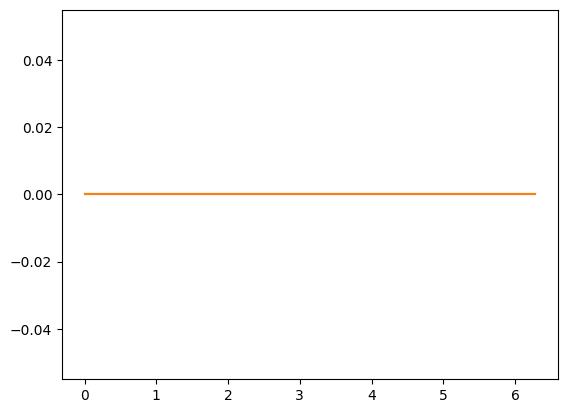

In [16]:
plt.plot(k, Hli)
plt.plot(k, dHli)
#plt.plot(k, spinupH)